<a href="https://colab.research.google.com/github/kmattingly8/ANA500.v2/blob/main/ANA675_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANA 675 Assignment 2
###Kirsten Mattingly
####January 17, 2025

<br>
<br>


**Directions**: Use Keras to design and train MLP neural network (Backpropagation algorithm) to work as an XOR gate of two inputs. At the end show the evaluation and the prediction of your neural network.
<br>
<br>

**Definition**: An XOR (Exclusive OR) gate for 2 inputs outputs true (1) when the inputs are different from each other and false (0) when the inputs are the same.

Truth Table for an XOR Gate (2 inputs):

|Input A	  |Input B	|Output (A XOR B)|
|-------      |-------  |----------------|
|0	      |0	        |0|
|0	      |1	        |1|
|1	      |0	        |1|
|1	      |1	        |0|

Summary of XOR Gate:
- When both inputs are the same (either 0,0 or 1,1), the output is 0.
- When the inputs are different (0,1 or 1,0), the output is 1.
<br>
<br>

**Project Steps**:
1. Data Preparation: Define the input-output pairs for the XOR gate.
2. Model Creation: Create a simple neural network with at least one hidden layer.
3. Model Compilation: Compile the model with an appropriate optimizer and loss function.
4. Model Training: Train the model on the XOR dataset.
5. Evaluation and Prediction: Evaluate the model's performance and make predictions on the input.

In [ ]:
# Import Libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
print(tf.__version__)

2.17.1


In [ ]:
# Define the XOR Dataset

# Inputs (X)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Outputs (Y)
y = np.array([[0],
              [1],
              [1],
              [0]])

In [ ]:
# Create the MLP model
model = Sequential()
model.add(tf.keras.Input(shape=(2,))) # Input layer (2 inputs)
model.add(Dense(4, activation='relu'))  # Hidden layer (4 neurons), relu activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 output (XOR result), sigmoid for binary classification

In [ ]:
# Compile the model
model.compile(optimizer=Adam(),  # Adam optimizer
              loss='binary_crossentropy',  # Binary crossentropy for binary classification
              metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Predictions:
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 1.0474e-05

Final loss: 0.0000
Final accuracy: 1.0000


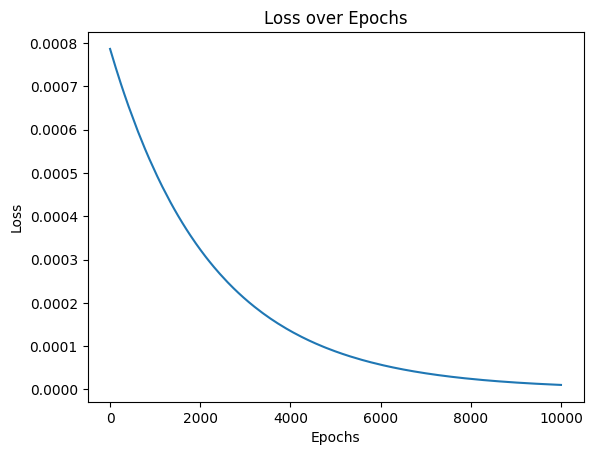

In [ ]:
# Train the model
history = model.fit(X, y, epochs=10000, verbose=0)  # Train the model for 10,000 epochs

# Make predictions
predictions = model.predict(X)
predictions = (predictions > 0.5).astype(int)  # Convert the predictions to 0 or 1 with threshold at 0.5 for binary classification

print("\nPredictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {predictions[i][0]}")

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"\nFinal loss: {loss:.4f}")
print(f"Final accuracy: {accuracy:.4f}")

# Plot the Loss over Epochs chart
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

As we can see from the predictions above, an MLP network with only an input layer, one hidden layer with 4 neurons, and an output layer was able to learn the XOR gate rules extremely well over 10,000 epochs. After training, its predictions were 100% accurate.

The loss reduction throughout the training can be seen in the Loss over Epochs curve above. Loss decreased quite quickly at first, and then slowed down over the epochs until it leveled out very close to zero.